## Importing libraries

In [46]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Loading testing and training data

In [7]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
len(X_train)

60000

In [52]:
type(X_train)

numpy.ndarray

In [9]:
len(X_test)

10000

In [11]:
X_train[0].shape

(28, 28)

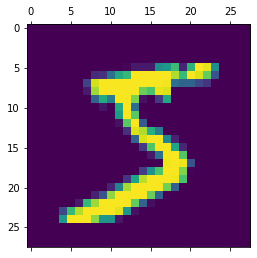

In [12]:
plt.matshow(X_train[0])

In [13]:
y_train[0]

5

## Flattening 28x28 matrix into 784x1 array

In [14]:
x_train_flattened = X_train.reshape(len(X_train),28*28)
x_test_flattened = X_test.reshape(len(X_test),28*28)

In [16]:
x_train_flattened.shape

(60000, 784)

## Creating Model

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7542 - accuracy: 0.8381
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.0866 - accuracy: 0.8775
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.7397 - accuracy: 0.8817
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5944 - accuracy: 0.8833
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3408 - accuracy: 0.8862


Accuracy is just 88.62 which is terrible. 99% is good

Reason for bad accuracy is because the input is not scaled

## Reattempting using scaled inputs

In [34]:
x_train_scaled = x_train_flattened/255
x_test_scaled = x_test_flattened/255

In [35]:
model_scaled = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

model_scaled.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_scaled.fit(x_train_scaled,y_train,epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4700 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2839 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2737 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9248


Note that this accuracy is the accuracy on train dataset

We must find accuracy on test dataset

In [36]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 6.1786 - accuracy: 0.8864


[6.178640842437744, 0.8863999843597412]

In [37]:
model_scaled.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2757 - accuracy: 0.9232


[0.2756897807121277, 0.9232000112533569]

## Analysing the accuracy using confusion matrix

First 5 elements of y_test

In [38]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

First 5 images of x_test

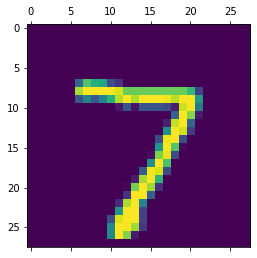

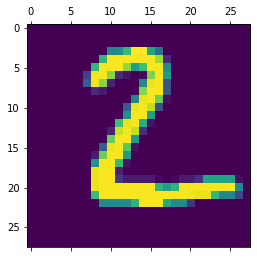

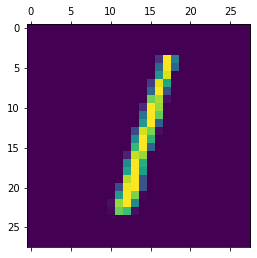

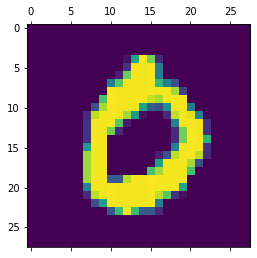

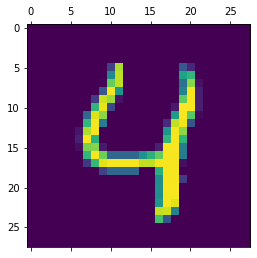

In [39]:
for i in range(5):
    plt.matshow(X_test[i])

making y_predicted as the predicted valued of all x_test_scaled

In [40]:
y_predicted = model_scaled.predict(x_test_scaled)

313/313 [==============================] - 0s 1ms/step


First 5 values of y_predicted

In [41]:
y_predicted[:5]

array([[2.01962404e-02, 5.00786371e-07, 4.62874286e-02, 9.77035940e-01,
        3.77178541e-03, 1.30982563e-01, 1.39743565e-06, 9.99718368e-01,
        1.19687706e-01, 6.97799563e-01],
       [4.60616708e-01, 7.73694785e-03, 9.99443233e-01, 4.99503374e-01,
        1.16279952e-09, 8.68141413e-01, 8.40958893e-01, 6.07486717e-13,
        3.45789194e-01, 3.43041906e-09],
       [3.83142964e-04, 9.93223608e-01, 6.47319078e-01, 3.39482874e-01,
        3.08185108e-02, 1.34585798e-01, 1.61358669e-01, 1.07201926e-01,
        3.85384798e-01, 5.33892289e-02],
       [9.99058008e-01, 2.64116906e-08, 6.72232658e-02, 1.48538277e-02,
        1.27849838e-04, 9.66582745e-02, 6.71933591e-02, 9.75853764e-03,
        5.98398820e-02, 1.99894197e-02],
       [3.46950069e-02, 6.27392728e-05, 1.32982567e-01, 4.36321646e-03,
        9.93405104e-01, 9.78286937e-03, 8.12459439e-02, 1.70482069e-01,
        3.22462738e-01, 6.93508506e-01]], dtype=float32)

y_predicted stores array of size 10. We need only index of the maximum value

In [42]:
np.argmax(y_predicted[0])

7

In [43]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Now creating a confusion matrix

In [47]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    4,    6,    2,    3,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,   10,  908,   20,   11,    4,   11,    9,   52,    3],
       [   1,    0,   11,  941,    2,   12,    1,    7,   28,    7],
       [   2,    1,    4,    1,  935,    0,    6,    3,    9,   21],
       [   8,    3,    2,   49,   12,  750,   11,    5,   46,    6],
       [  12,    3,   10,    2,   12,   11,  901,    2,    5,    0],
       [   1,   10,   21,   12,   11,    1,    0,  925,    4,   43],
       [   5,    7,    5,   21,   11,   21,    8,    3,  885,    8],
       [  10,    8,    1,   11,   46,    5,    0,    7,   10,  911]])>

Now a better visual way to represent this matrix

Text(69.0, 0.5, 'Truth')

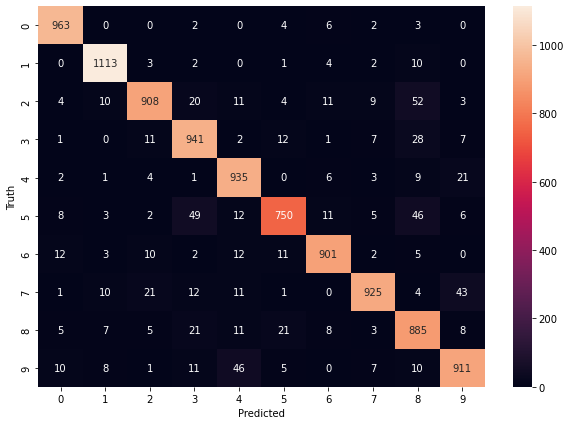

In [48]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Improving the accuracy even more by adding hidden layers

In [50]:
model_hidden = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model_hidden.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_hidden.fit(x_train_scaled,y_train,epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2738 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1252 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0882 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0667 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0525 - accuracy: 0.9837


In [51]:
model_hidden.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9763


[0.08128591626882553, 0.9763000011444092]

Accuracy increased to 97.63 which is a great improvement